# Subscriptions prototype notebook   
Prepared by: Scott Dodson  
Updated on: May 27, 2025  

Skipping over UI development by using a notebook, Pandas, Matpltlib, and Seaborn.  
Using this workbook should help identify the most relevant fields for a database schema

In [22]:
import pandas as pd
# pd.__version__

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('subscriptions.csv', index_col='product')
df

,company,subscription_cost,tax,yearly,monthly,start_date,renewal_date
product,,,,,,,
AppleTV,Apple,9.99,1.04,False,True,2025-05-01,2025-06-01
SomeYearly,AllYearLong,200.00,9.20,True,False,2024-06-01,2025-06-01


In [25]:
c_names = df.columns.tolist()
# c_names

### What subscriptions am I paying for this month (between today and the start of next month)?

In [26]:
from datetime import datetime
from dateutil.relativedelta import *
use_date = datetime.now()

In [27]:
end_of_month = use_date+relativedelta(months=+1,day=1)

In [28]:
df[df.renewal_date.between(datetime.today().strftime('%Y-%m-%d'), end_of_month.strftime('%Y-%m-%d'))]

,company,subscription_cost,tax,yearly,monthly,start_date,renewal_date
product,,,,,,,
AppleTV,Apple,9.99,1.04,False,True,2025-05-01,2025-06-01
SomeYearly,AllYearLong,200.00,9.20,True,False,2024-06-01,2025-06-01


### Total yearly cost

In [29]:
monthly_to_year = df.loc[df['monthly'] == True, 'subscription_cost'].sum() * 12

In [30]:
yearly_sum = df.loc[df['yearly'] == True, 'subscription_cost'].sum()

In [31]:
yearly_total = monthly_to_year + yearly_sum
print("Total Yearly cost: ${:.2f}".format(yearly_total))

Total Yearly cost: $319.88


### Yearly by company

In [33]:
# what if yearly des not exist?


adj_yearly_cost = df['adjusted_yearly_cost'] = df.apply(lambda x: x['subscription_cost'] * 12 if x['monthly'] else x['subscription_cost'], axis=1)
total_yearly_by_company = df.groupby('company')['adjusted_yearly_cost'].sum()
# adj_yearly_cost

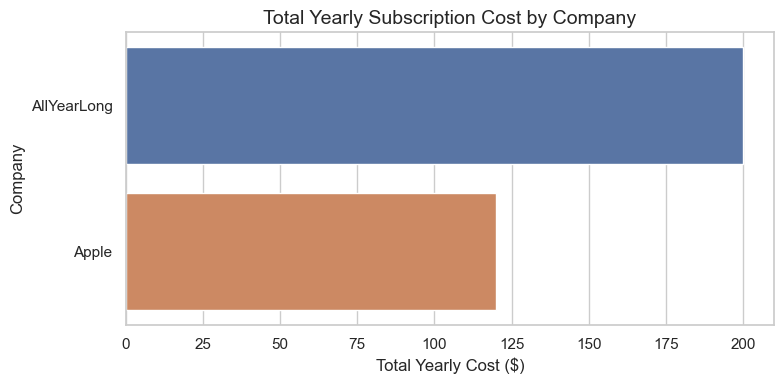

In [34]:
# Optional: Set a nicer style
sns.set(style='whitegrid')

# Sort data
sorted_data = total_yearly_by_company.sort_values(ascending=False)

# Create the plot
plt.figure(figsize=(8, 4))  # More compact size
sns.barplot(x=sorted_data.values, y=sorted_data.index, hue=sorted_data.index, legend=False)

# Add labels and title
plt.title('Total Yearly Subscription Cost by Company', fontsize=14)
plt.xlabel('Total Yearly Cost ($)')
plt.ylabel('Company')
plt.tight_layout()

plt.show()
